In [39]:
import sys
sys.path.append(r'/Users/brendanliang/Code/brendans_bloomberg') 
import numpy as np
import pandas as pd
import os
import subprocess
import shlex
import matplotlib.pyplot as plt
from datetime import date
from tools.helper.pandas_tools import find_col_index
from interface.company import Company
from interface.indicator import Yahoo_Indicator
from interface.forex import forex

In [40]:
company = Company("GOOG")

# Share Price History

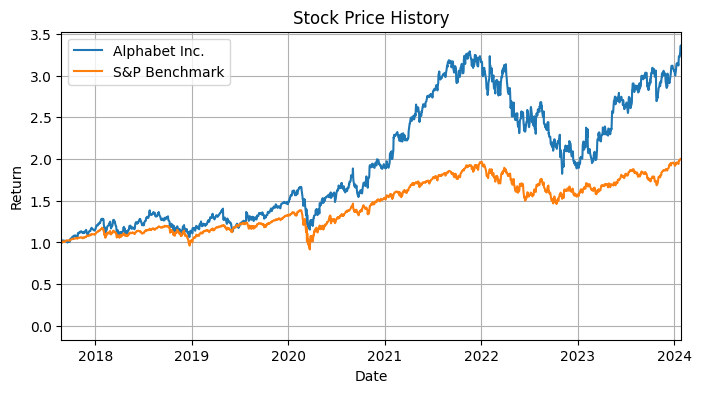

In [41]:
start_date = date(2017,8,25)
company_index = find_col_index(company.price_history.dates.transpose(), start_date, 0)
benchmark_index_index = find_col_index(Yahoo_Indicator("^GSPC").dates.transpose(), start_date, 0)
plt.figure(figsize=(8, 4))  # Customize the figure size if needed
plt.plot(company.price_history.dates, company.price_history.close/float(company.price_history.close.iloc[company_index]))  # Use dates or converted values for x-axis
plt.plot(Yahoo_Indicator("^GSPC").dates, Yahoo_Indicator("^GSPC").close/float(Yahoo_Indicator("^GSPC").close.iloc[benchmark_index_index]))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Stock Price History")
plt.grid(True)
plt.xlim(start_date, date.today())
plt.legend([str(company.profile.name[0]), "S&P Benchmark"])

# Financial Performance

## Income Statement

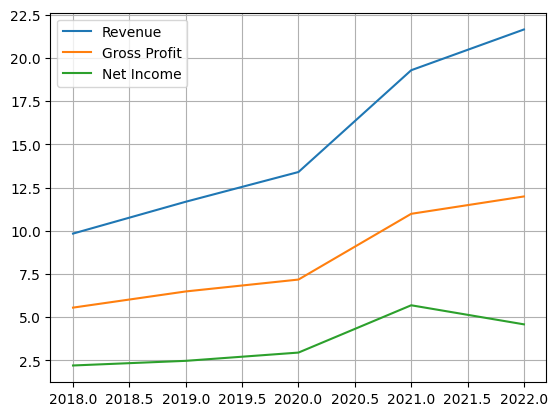

In [42]:
n = 5
fig, ax = plt.subplots()
year, revenue, gross_profit, net_income, shs_out = [], [], [], [], []
for i in range(n):
    year.append(company.annual_income_statement.income_statement[i]['calendarYear'])
    revenue.append(company.annual_income_statement.income_statement[i]['revenue'])
    gross_profit.append(company.annual_income_statement.income_statement[i]['grossProfit'])
    net_income.append(company.annual_income_statement.income_statement[i]['netIncome'])
    shs_out.append(company.annual_income_statement.income_statement[i]['weightedAverageShsOut'])
    
ax.plot(year, np.array(revenue)/np.array(shs_out), label = "Revenue")
ax.plot(year, np.array(gross_profit)/np.array(shs_out), label = "Gross Profit")
ax.plot(year, np.array(net_income)/np.array(shs_out), label = "Net Income")
ax.grid()
ax.legend()
plt.show()

## Cash Flows

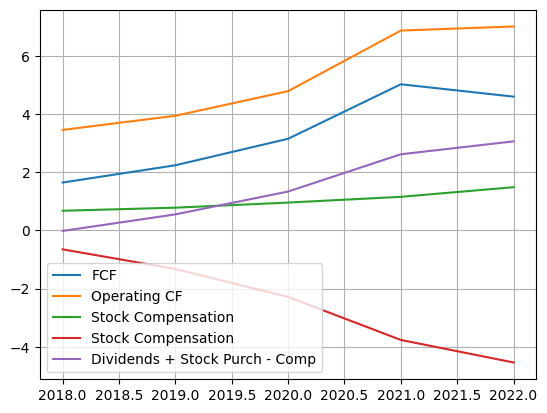

In [43]:
fig, ax = plt.subplots()
year, fcf, operating_cf, stock_comp, stock_repurchase, dividends = [], [], [], [], [], []
for i in range(n):
    year.append(company.annual_cashflow.cashflow[i]['calendarYear'])
    stock_comp.append(company.annual_cashflow.cashflow[i]['stockBasedCompensation'])
    stock_repurchase.append(company.annual_cashflow.cashflow[i]['commonStockRepurchased'])
    dividends.append(company.annual_cashflow.cashflow[i]['dividendsPaid'])
    operating_cf.append(company.annual_cashflow.cashflow[i]['operatingCashFlow'])
    fcf.append(company.annual_cashflow.cashflow[i]['freeCashFlow'])
    
ax.plot(year, np.array(fcf)/np.array(shs_out), label = "FCF")
ax.plot(year, np.array(operating_cf)/np.array(shs_out), label = "Operating CF")
ax.plot(year, np.array(stock_comp)/np.array(shs_out), label = "Stock Compensation")
ax.plot(year, (-np.array(dividends)-np.array(stock_repurchase))/np.array(shs_out), label = "Dividends + Stock Purchase")
ax.plot(year, (-np.array(stock_comp)-np.array(dividends)-np.array(stock_repurchase))/np.array(shs_out), label = "Dividends + Stock Purch - Comp")
ax.grid()
ax.legend()
plt.show()

## Balance Sheet

# Historical Valuations